# Tipos de matrices especiales

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Matriz diagonal

In [2]:
print("Construcción:\n", np.diag([1, 2]))
print("Extracción: ", np.diag(np.array([ [1, 0], [0, 2]])))
print("Identidad:\n", np.eye(2))

Construcción:
 [[1 0]
 [0 2]]
Extracción:  [1 2]
Identidad:
 [[1. 0.]
 [0. 1.]]


## Matrices triangulares

In [3]:
A = np.arange(1, 5).reshape((2, 2))
print(A, "\n", np.tril(A), "\n", np.triu(A))

[[1 2]
 [3 4]] 
 [[1 0]
 [3 4]] 
 [[1 2]
 [0 4]]


## Matrices definidas positivas

Dada una matriz real y simétrica, $\mathbf{A}\in\mathbb{R}^{n\times n}$, su **forma cuadrática** asociada es:
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}%
=\sum_{i=1}^n\sum_{j=1}^nA_{ij}x_ix_j$$
* $\mathbf{A}$ es **definida positiva** ($\mathbf{A}\succ 0$ o $\mathbf{A}> 0$) $~~$ sii $~~$ $f(\boldsymbol{x}>0)\;$ para todo $\boldsymbol{x}$ no nulo
* $\mathbf{A}$ es **semi-definida positiva** ($\mathbf{A}\succeq 0$ o $\mathbf{A}\geq 0$) $~~$ sii $~~$ $f(\boldsymbol{x}\geq 0)\;$ para todo $\boldsymbol{x}$ no nulo
* $\mathbf{A}$ es **definida negativa** ($\mathbf{A}\prec 0$ o $\mathbf{A}> 0$) $~~$ sii $~~$ $f(\boldsymbol{x}<0)\;$ para todo $\boldsymbol{x}$ no nulo
* $\mathbf{A}$ es **semi-definida negativa** ($\mathbf{A}\preceq 0$ o $\mathbf{A}\leq 0$) $~~$ sii $~~$ $f(\boldsymbol{x}\leq 0)\;$ para todo $\boldsymbol{x}$ no nulo
* $\mathbf{A}$ es **indefinida** si no es semi-definida positiva ni semi-definida negativa




Si $\mathbf{A}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)\;$ con $\;\{\lambda_i>0\}$, entonces su forma cuadrática es definida positiva:
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}=\sum_{i=1}^n\lambda_ix_i^2>0$$
El conjunto de nivel $C_k$ para $f$, $C_k=\{\boldsymbol{x}: f(\boldsymbol{x})=k\}$, es un hiperelipsoide centrado en el origen de semiejes alineados con los ejes canónicos y longitudes $\;\{\sqrt{k/\lambda_i}\}$.

**Ejemplo:**

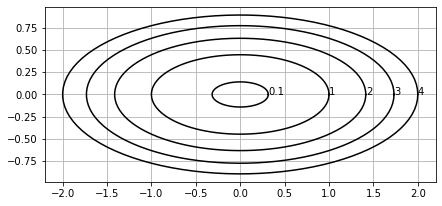

In [4]:
A = np.diag([1, 5])
t = np.linspace(0, 2.0 * np.pi, 100)
circ = np.array([np.cos(t), np.sin(t)]).T
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(aspect='equal'); ax.grid()
for k in (.1, 1, 2, 3, 4):
    semiaxes = np.sqrt(k * np.linalg.inv(A))
    C = circ @ semiaxes # C @ A @ C.T = k
    plt.plot(C[:, 0], C[:, 1], color='black')
    plt.annotate(k, xy=(C[0]))

## Matrices ortogonales

$\mathbf{U}=(\boldsymbol{u}_1,\dotsc,\boldsymbol{u}_n)\in\mathbb{R}^{n\times n}$ es una **matriz ortogonal** si el conjunto de todas sus columnas (y el de sus filas) es ortonormal, esto es, formado por vectores ortogonales dos a dos y normalizados; en breve, $\boldsymbol{u}_i^t\boldsymbol{u}_j=\mathbb{I}(i=j)$, por lo que:
$$\mathbf{U}\;\text{es ortogonal}\quad\text{sii}\quad\mathbf{U}^t\mathbf{U}=\mathbf{I}=\mathbf{U}\mathbf{U}^t
\qquad\Leftrightarrow\qquad%
\mathbf{U}\;\text{es ortogonal}\quad\text{sii}\quad\mathbf{U}^t=\mathbf{U}^{-1}$$
Las transformaciones mediante matrices ortogonales preservan longitudes y ángulos, por lo que generalizan rotaciones (si $\lvert\mathbf{U}\rvert=1$) y reflexiones (si $\lvert\mathbf{U}\rvert=-1$).

**Ejemplo:** $\;$ Matriz de rotación 2d de $\alpha$ radianes en sentido antihorario, $\;\mathbf{R}(\alpha)=\begin{pmatrix}\cos(\alpha)&-\sin(\alpha)\\\sin(\alpha)&\cos(\alpha)\end{pmatrix}$.

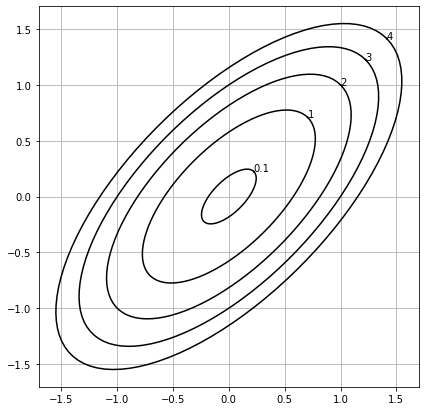

In [8]:
A = np.diag([1, 5])
t = np.linspace(0, 2.0 * np.pi, 100)
circ = np.array([np.cos(t), np.sin(t)]).T
alpha = np.pi / 4
R = np.array([ [np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)] ])
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(aspect='equal'); ax.grid()
for k in (.1, 1, 2, 3, 4):
    semiaxes = np.sqrt(k * np.linalg.inv(A))
    C = circ @ semiaxes # C @ A @ C.T = k
    C = C @ R.T
    plt.plot(C[:, 0], C[:, 1], color='black')
    plt.annotate(k, xy=(C[0]))